In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [4]:
def factorial_loop(n):
    result = 1
    for number in range(n):
        result *=(number +1)
    return result

In [5]:
factorial_loop(6)

720

In [6]:
# rekurencja
def factorial(n):
    if n ==1:
        return 1
    else:
        return n* factorial(n-1)

In [7]:
factorial(6)

720

In [8]:
#fibonnaci
def fibb(n):
    if n == 1:
        return 1
    elif n == 2:
        return 1
    else:
        return fibb(n-1) + fibb(n-2)

In [10]:
fibb(6)

8

# Generowanie danych
Na poczatek wygenerujemy przykładowe dane. Niech będzie to pomiar pewnej wartości. Dane powinnny mieć format 1xTx1 gdzie T to ilość próbek.

(1, 300, 1)


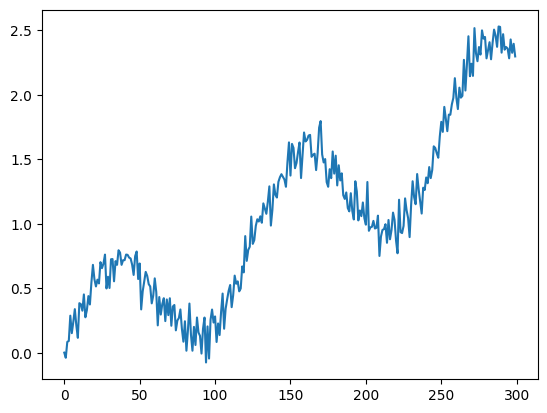

In [11]:
T = 300
time = np.linspace(0,10,T)
X = 0.2 * time + np.random.randn(T)*0.1 + 0.5 * np.sin(time*1.5)
X = np.expand_dims(X,0)
X = np.expand_dims(X,-1)
print(X.shape)
plt.plot(X[0,:,0])

### Tworzenie prostej sieci RNN(N:1)
- jeden Batch, jeden pomiar
- 300 Timestep
- 1 cecha
- potrzymujemy tylko jeden predict

In [16]:
rnn = layers.SimpleRNN(units=64)
# units = wymiarowość wektora h
output = rnn(X)
print(output.shape)

(1, 64)


### Zadanie:
Sprawdź wartość min i max zwróconych wyników. Czy pasują do nieliniowości tanh?

In [14]:
print(f'Minimalna wartość wyjścia: {np.min(output)}')
print(f'Maksymalna wartość wyjścia: {np.max(output)}')

Minimalna wartość wyjścia: -0.9329003095626831
Maksymalna wartość wyjścia: 0.8721257448196411


### Klasyfikacja całej sekwencji do jednej z 10 klas

In [25]:
model = keras.Sequential()
model.add(layers.SimpleRNN(units = 64, input_shape = (None, 1) ))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()
output = model(X)
print(output.shape)
print(output)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 4,874
Trainable params: 4,874
Non-trainable params: 0
_________________________________________________________________
(1, 10)
tf.Tensor(
[[0.03117243 0.06361199 0.19089673 0.074964   0.05541987 0.03715721
  0.15383203 0.08599515 0.02960845 0.27734217]], shape=(1, 10), dtype=float32)


### Tworzenie prostej sieci RNN(N:N)

In [21]:
rnn = layers.SimpleRNN(units=64, return_sequences = True)
# return_sequences = printowanie wektora h w każdym momencie
output = rnn(X)
print(output.shape)

(1, 300, 64)


### Wielowarstwowa sieć RNN

In [26]:
model = keras.Sequential()
model.add(layers.SimpleRNN(units = 64, return_sequences = True, input_shape = (None, 1) ))
model.add(layers.SimpleRNN(units = 64 ))

model.add(layers.Dense(10, activation = 'softmax'))
model.summary()
output = model(X)
print(output.shape)
print(output)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, None, 64)          4224      
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 13,130
Trainable params: 13,130
Non-trainable params: 0
_________________________________________________________________
(1, 10)
tf.Tensor(
[[0.0259574  0.19038877 0.03402377 0.05744634 0.08367423 0.04373544
  0.04834338 0.04231258 0.23503457 0.23908353]], shape=(1, 10), dtype=float32)


### Zadanie:
Skąd wynikają liczby parametrów?

In [ ]:
# (61, 1) 64 + 64*64 + 64
# (32, 2) 32 + 32*32 + 2*32